In [84]:
import yfinance as yf
import pandas as pd
import ta
import matplotlib.pyplot as plt

In [85]:
df = yf.download('HRB', start='2020-01-01')

[*********************100%%**********************]  1 of 1 completed


In [86]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,23.600000,23.600000,23.320000,23.480000,19.606989,2865700
2020-01-03,23.290001,23.520000,23.190001,23.459999,19.590290,2626600
2020-01-06,23.360001,23.629999,23.260000,23.530001,19.648741,3233900
2020-01-07,23.500000,23.620001,23.430000,23.520000,19.640392,2918800
2020-01-08,23.520000,23.629999,23.340000,23.379999,19.523483,2328600
...,...,...,...,...,...,...
2024-04-22,47.009998,47.470001,46.490002,47.279999,47.279999,996900
2024-04-23,47.220001,48.099998,46.869999,47.650002,47.650002,1032600
2024-04-24,47.740002,48.209999,47.639999,47.930000,47.930000,908800


In [87]:
def indicators(df):
    df['SMA_200'] = ta.trend.sma_indicator(df.Close, window=200)
    df['stoch_k'] = ta.momentum.stochrsi_k(df.Close, window=10)
    df.dropna(inplace=True)

In [88]:
indicators(df)

In [89]:
df

,Open,High,Low,Close,Adj Close,Volume,SMA_200,stoch_k
Date,,,,,,,,
2020-10-15,17.350000,17.690001,17.320000,17.469999,15.332617,2659900,17.12040,0.054903
2020-10-16,17.490000,17.719999,17.430000,17.440001,15.306293,2853900,17.09020,0.003563
2020-10-19,17.570000,17.820000,17.459999,17.670000,15.508150,4121700,17.06125,0.089495
2020-10-20,17.969999,18.299999,17.790001,17.959999,15.762671,2823000,17.03340,0.266157
2020-10-21,17.879999,18.290001,17.780001,18.150000,15.929422,2154900,17.00655,0.501289
...,...,...,...,...,...,...,...,...
2024-04-22,47.009998,47.470001,46.490002,47.279999,47.279999,996900,43.44275,0.725048
2024-04-23,47.220001,48.099998,46.869999,47.650002,47.650002,1032600,43.52395,0.917693
2024-04-24,47.740002,48.209999,47.639999,47.930000,47.930000,908800,43.60525,1.000000


In [90]:
df['Buy'] = (df.Close > df.SMA_200) & (df.stoch_k < 0.05)
df

,Open,High,Low,Close,Adj Close,Volume,SMA_200,stoch_k,Buy
Date,,,,,,,,,
2020-10-15,17.350000,17.690001,17.320000,17.469999,15.332617,2659900,17.12040,0.054903,False
2020-10-16,17.490000,17.719999,17.430000,17.440001,15.306293,2853900,17.09020,0.003563,True
2020-10-19,17.570000,17.820000,17.459999,17.670000,15.508150,4121700,17.06125,0.089495,False
2020-10-20,17.969999,18.299999,17.790001,17.959999,15.762671,2823000,17.03340,0.266157,False
2020-10-21,17.879999,18.290001,17.780001,18.150000,15.929422,2154900,17.00655,0.501289,False
...,...,...,...,...,...,...,...,...,...
2024-04-22,47.009998,47.470001,46.490002,47.279999,47.279999,996900,43.44275,0.725048,False
2024-04-23,47.220001,48.099998,46.869999,47.650002,47.650002,1032600,43.52395,0.917693,False
2024-04-24,47.740002,48.209999,47.639999,47.930000,47.930000,908800,43.60525,1.000000,False


In [91]:
buydates, selldates = [], []
buys, sells = [], []

last_selldate = pd.to_datetime('1900-01-01')

for row in range(len(df)):
    if len(selldates) > 0:
        last_selldate = selldates[-1]
    if df.iloc[row].Buy:
        buyprice = df.iloc[row].Close * 0.97
        k = 1
        while True:
            if buyprice >= df.iloc[row + k].Low:
                buydate = df.iloc[row + k].name
                break
            elif k > 10:
                break
            else:
                k += 1
        if buydate > last_selldate:
            buydates.append(buydate)
            buys.append(buyprice)
            for j in range(1, 11):
                if df.iloc[row+k+j].Close > buyprice:
                    sellprice = df.iloc[row+k+j+1].Open
                    selldate = df.iloc[row+k+j+1].name
                    sells.append(sellprice)
                    selldates.append(selldate)
                    break
                elif j == 10:
                    sellprice = df.iloc[row+k+j+1].Open
                    selldate = df.iloc[row+k+j+1].name
                    sells.append(sellprice)
                    selldates.append(selldate)
                    

In [92]:
buydates

[Timestamp('2020-10-29 00:00:00'),
 Timestamp('2020-12-07 00:00:00'),
 Timestamp('2021-12-01 00:00:00'),
 Timestamp('2022-04-29 00:00:00'),
 Timestamp('2022-06-13 00:00:00'),
 Timestamp('2022-08-30 00:00:00'),
 Timestamp('2022-09-26 00:00:00'),
 Timestamp('2022-10-03 00:00:00'),
 Timestamp('2022-12-15 00:00:00'),
 Timestamp('2022-12-27 00:00:00'),
 Timestamp('2023-10-27 00:00:00'),
 Timestamp('2023-11-08 00:00:00'),
 Timestamp('2024-03-15 00:00:00')]

In [93]:
selldates

[Timestamp('2020-11-02 00:00:00'),
 Timestamp('2020-12-22 00:00:00'),
 Timestamp('2021-12-03 00:00:00'),
 Timestamp('2022-05-12 00:00:00'),
 Timestamp('2022-06-27 00:00:00'),
 Timestamp('2022-09-13 00:00:00'),
 Timestamp('2022-09-28 00:00:00'),
 Timestamp('2022-10-05 00:00:00'),
 Timestamp('2022-12-19 00:00:00'),
 Timestamp('2023-01-12 00:00:00'),
 Timestamp('2023-11-02 00:00:00'),
 Timestamp('2023-11-10 00:00:00'),
 Timestamp('2024-03-19 00:00:00')]

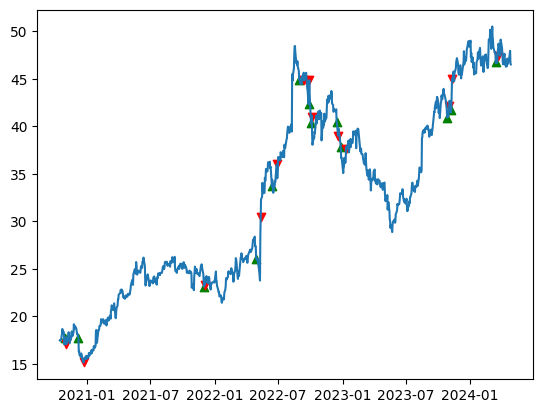

In [94]:
plt.plot(df.Close)
plt.scatter(df.loc[buydates].index, df.loc[buydates].Close, marker='^', c='g')
plt.scatter(df.loc[selldates].index, df.loc[selldates].Close, marker='v', c='r')
plt.show()

In [95]:
buys

[16.91680051803589,
 17.644300518035887,
 23.51279977798462,
 26.500399703979493,
 34.38650074005127,
 45.42510177612304,
 42.68,
 41.050399703979494,
 40.27440044403076,
 37.84940044403076,
 41.27349925994873,
 40.47809955596924,
 46.33690044403076]

In [96]:
sells

[17.440000534057617,
 15.199999809265137,
 23.469999313354492,
 28.280000686645508,
 34.90999984741211,
 45.15999984741211,
 43.66999816894531,
 41.0099983215332,
 40.34000015258789,
 37.93000030517578,
 41.84000015258789,
 43.40999984741211,
 46.869998931884766]

In [97]:
[(sell - buy)/buy for sell, buy in zip(sells, buys)]

[0.030927835051546417,
 -0.13853202660384312,
 -0.0018203048992149718,
 0.06715374117163889,
 0.015223971503186478,
 -0.005836022779155995,
 0.023195833386722417,
 -0.0009841897457182175,
 0.0016288189975240924,
 0.002129488451586008,
 0.013725535823149537,
 0.07243176739038654,
 0.011504837025038435]

In [98]:
profits = pd.DataFrame([(sell - buy)/buy for sell, buy in zip(sells, buys)])
profits

,0
0,0.030928
1,-0.138532
2,-0.001820
3,0.067154
4,0.015224
5,-0.005836
6,0.023196
7,-0.000984
8,0.001629
9,0.002129


In [99]:
(profits + 1).cumprod()

,0
0,1.030928
1,0.888111
2,0.886495
3,0.946026
4,0.960428
5,0.954823
6,0.976971
7,0.976010
8,0.977599
9,0.979681


In [100]:
(df.Close.pct_change() + 1).cumprod()

Date
2020-10-15         NaN
2020-10-16    0.998283
2020-10-19    1.011448
2020-10-20    1.028048
2020-10-21    1.038924
                ...   
2024-04-22    2.706354
2024-04-23    2.727533
2024-04-24    2.743561
2024-04-25    2.669720
2024-04-26    2.661706
Name: Close, Length: 888, dtype: float64